Anita Soroush 98222085 - Machine Learning - Project 1, Task 1

In [1]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

dataset url: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [ ]:
! kaggle datasets download iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 12.5MB/s]


In [ ]:
! unzip mobile-price-classification.zip

Archive:  mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import sys
import os
import pandas as pd
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import datasets
import os
import csv
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids
from sklearn import metrics
from sklearn.feature_selection import RFE

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.shape

(2000, 21)

In [ ]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
nulls = data.isnull().sum()
nulls

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
data.duplicated().any()

False

finding outliers (Using Standard Ddeviation):

In [ ]:
# the following list contains columns that may have outlier
columns = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", 
           "mobile_wt", "n_cores", "pc", "px_height", "px_width","ram",
           "sc_h", "sc_w", "talk_time"]

print("data shape before putting outliers aside:" , data.shape)
for column in columns:
    # print(column)
    upper = data[column].mean() + 3*data[column].std()
    lower = data[column].mean() - 3*data[column].std()
    # print(lower, upper)
    data= data[(data[column]<upper) & (data[column]>lower)]
print("data shape after putting outliers aside:" , data.shape)

data shape before putting outliers aside: (2000, 21)
data shape after putting outliers aside: (1988, 21)


In [ ]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,...,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.000000,1988.00000,1988.000000
mean,1237.593058,0.495473,1.522133,0.509054,4.226358,0.520624,32.089034,0.502012,140.159457,4.524145,...,643.926559,1251.535714,2126.544266,12.308350,5.771630,11.014588,0.760563,0.502515,0.50503,1.501509
std,439.498835,0.500105,0.816811,0.500044,4.220051,0.499700,18.128175,0.288438,35.361078,2.289980,...,442.961039,432.086772,1084.186322,4.215626,4.361399,5.459398,0.426847,0.500119,0.50010,1.118314
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000
25%,851.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.750000,1210.750000,9.000000,2.000000,6.000000,1.000000,0.000000,0.00000,1.000000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.00000,2.000000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,945.250000,1632.250000,3066.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.00000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,17.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.00000,3.000000


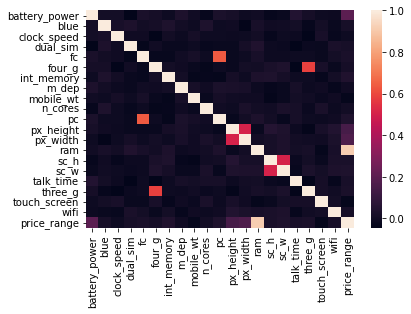

In [ ]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcd0154910>,
      dtype=object)

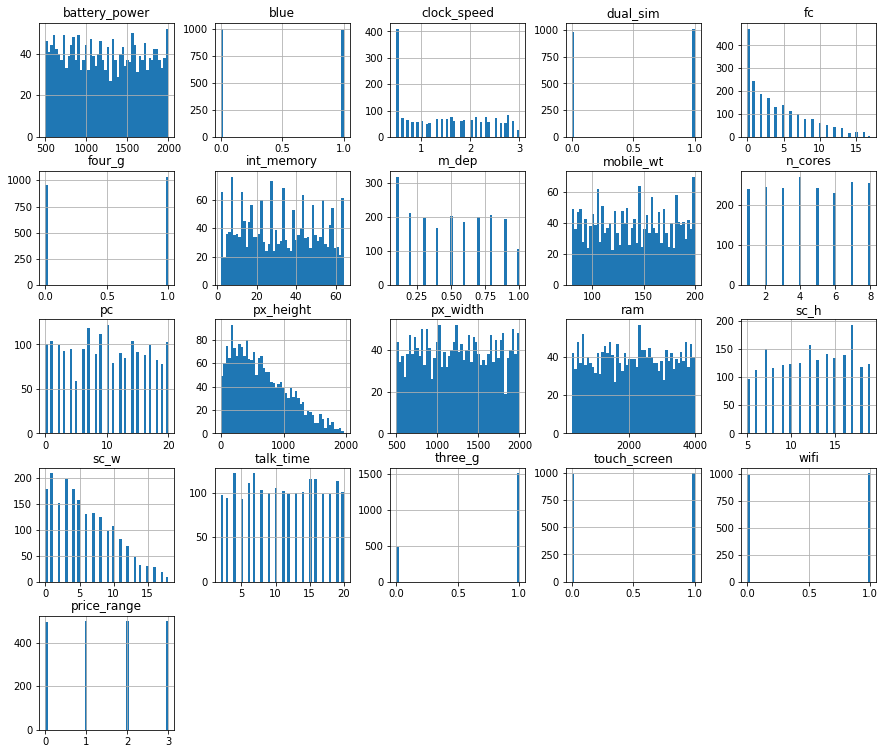

In [ ]:
data.hist(bins=50, figsize=(15,13))

Hypothetical tests:

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(data["talk_time"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.948, p=0.000
Probably not Gaussian


In [ ]:
# we need normalizing before most of the hypothetical tests:
normalizer = preprocessing.Normalizer().fit(data)
normalized_data = pd.DataFrame(normalizer.transform(data),
                           index= data.index,
                           columns= data.columns)

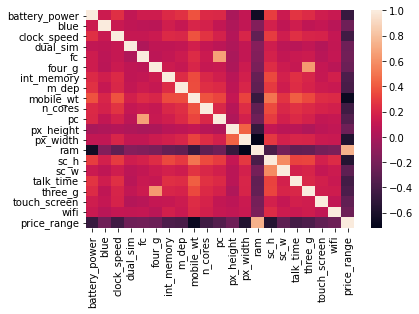

In [ ]:
import seaborn as sns
corr = normalized_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
from scipy.stats import pearsonr
data1 = normalized_data["ram"]
data2 = normalized_data["price_range"]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=0.739, p=0.000
Probably dependent


In [ ]:
from scipy.stats import ttest_ind
cheapest_phones = data.loc[data["price_range"] == 0]
data1 = cheapest_phones["pc"]
other_phones = data.loc[data["price_range"] != 0]
data2 = other_phones["pc"]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the difference is not significant')
else:
	print('Probably the different is significant')

stat=-1.446, p=0.148
Probably the difference is not significant


In [ ]:
data1 = cheapest_phones["touch_screen"]
data2 = other_phones["touch_screen"]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the difference is not significant')
else:
	print('Probably the different is significant')

stat=1.167, p=0.244
Probably the difference is not significant


In [ ]:
from scipy.stats import pearsonr
data1 = normalized_data["pc"]
data2 = normalized_data["ram"]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=-0.236, p=0.000
Probably dependent


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


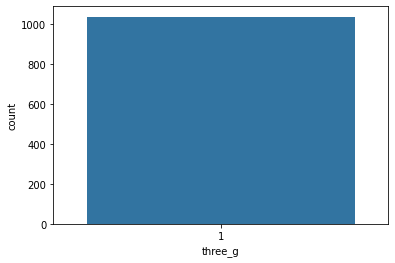

In [ ]:
have_four_g = data.loc[data["four_g"] == 1]
sns.countplot(have_four_g['three_g'])

In [ ]:
just_3_g = data.loc[(data["three_g"] == 1) & (data["four_g"] == 0)]
four_g = data.loc[data["four_g"] == 1]
stat, p = ttest_ind(just_3_g['price_range'], four_g['price_range'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the difference is not significant')
else:
	print('Probably the different is significant')

NameError: ignored

splitting test and train data:

In [ ]:
X = data.drop('price_range', axis=1)
y = data['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Classification:

(Logistic regression)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy of OvR Classifier: 0.67


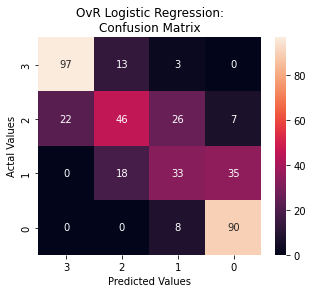

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Accuracy of OvO Classifier: 0.71


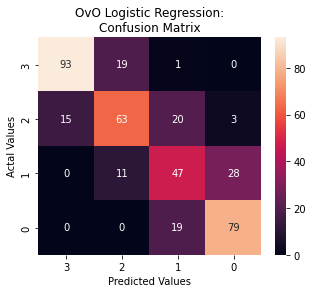

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-rest
OvR_clf = OneVsRestClassifier(LogisticRegression())
OvR_clf.fit(X_train, y_train)

y_test_pred = OvR_clf.predict(X_test)
print('Accuracy of OvR Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovr)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('OvR Logistic Regression:\nConfusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train, y_train)

y_test_pred = OvO_clf.predict(X_test)
print('Accuracy of OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('OvO Logistic Regression:\nConfusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

(SVM):

Accuracy of OvR Classifier: 0.94


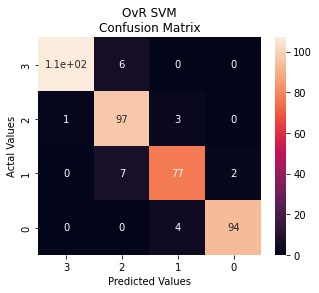

Accuracy of OvO Classifier: 0.95


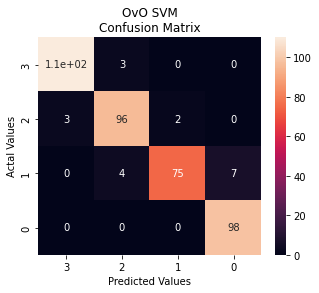

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-rest
OvR_clf = OneVsRestClassifier(SVC())
OvR_clf.fit(X_train, y_train)

y_test_pred = OvR_clf.predict(X_test)
print('Accuracy of OvR Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovr)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('OvR SVM\nConfusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# one-vs-one
OvO_clf = OneVsOneClassifier(SVC())
OvO_clf.fit(X_train, y_train)

y_test_pred = OvO_clf.predict(X_test)
print('Accuracy of OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('OvO SVM\nConfusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
data['price_range'].value_counts()

3    498
1    497
2    497
0    496
Name: price_range, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


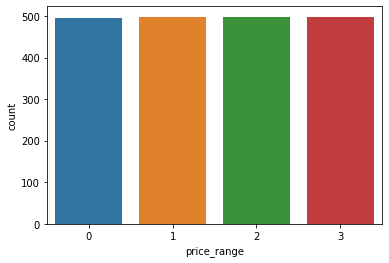

In [ ]:
# visualizing the target variable
sns.countplot(data['price_range'])

Scaling:

first of all we should fit the scaler on training data and then use it to scale both the training and the test data.

In [ ]:
# standard scaler:
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = pd.DataFrame(std_scale.transform(X_train),
                           index= X_train.index,
                           columns= X_train.columns)
X_test_std  = pd.DataFrame(std_scale.transform(X_test),
                           index= X_test.index,
                           columns= X_test.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdccbf551d0>,
      dtype=object)

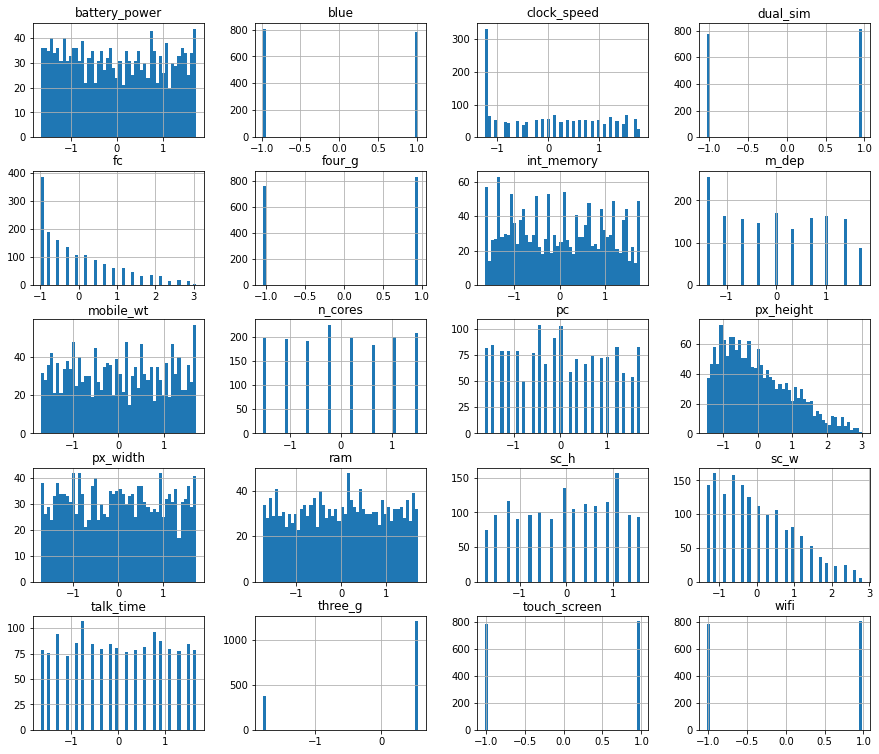

In [ ]:
X_train_std.hist(bins=50, figsize=(15,13))

Accuracy of OvR Classifier: 0.82


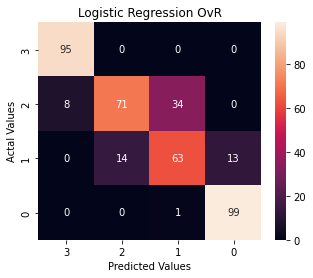

Accuracy of OvO Classifier: 0.96


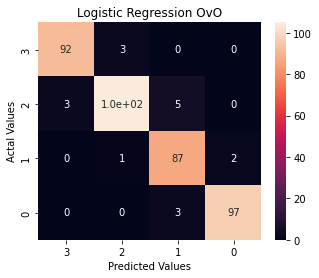

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-rest
OvR_clf = OneVsRestClassifier(LogisticRegression())
OvR_clf.fit(X_train_std, y_train)

y_test_pred = OvR_clf.predict(X_test_std)
print('Accuracy of OvR Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovr)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Logistic Regression OvR')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train_std, y_train)

y_test_pred = OvO_clf.predict(X_test_std)
print('Accuracy of OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Logistic Regression OvO')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# min-max scaler
min_max_scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train_minmax = pd.DataFrame(min_max_scaler.transform(X_train),
                           index= X_train.index,
                           columns= X_train.columns)
X_test_minmax = pd.DataFrame(min_max_scaler.transform(X_test),
                           index= X_test.index,
                           columns= X_test.columns)

Accuracy: 0.78


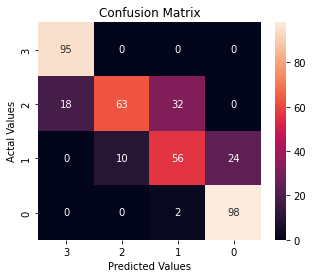

Accuracy: 0.94


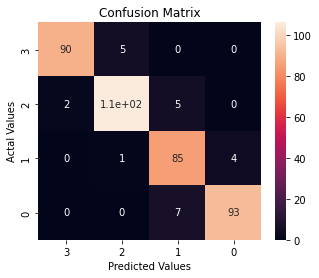

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-rest
OvR_clf = OneVsRestClassifier(LogisticRegression())
OvR_clf.fit(X_train_minmax, y_train)

y_test_pred = OvR_clf.predict(X_test_minmax)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovr)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train_minmax, y_train)

y_test_pred = OvO_clf.predict(X_test_minmax)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab41260690>,
      dtype=object)

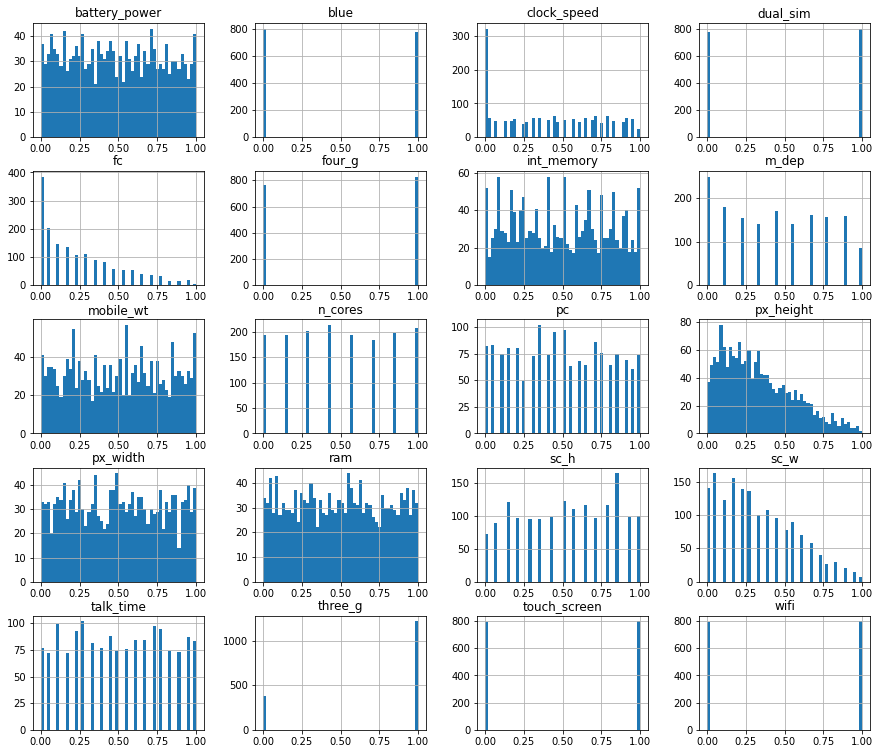

In [ ]:
X_train_minmax.hist(bins=50, figsize=(15,13))

In [ ]:
# normalization
normalizer = preprocessing.Normalizer().fit(X_train)
X_train_normalized = pd.DataFrame(normalizer.transform(X_train),
                           index= X_train.index,
                           columns= X_train.columns)
X_test_normalized = pd.DataFrame(normalizer.transform(X_test),
                           index= X_test.index,
                           columns= X_test.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab3d58bc50>,
      dtype=object)

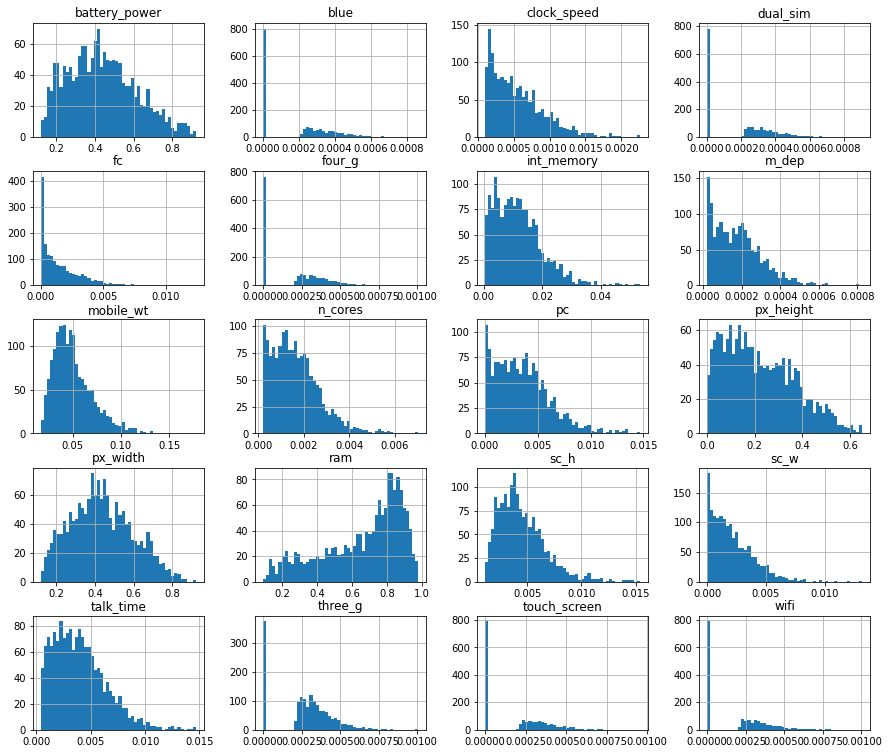

In [ ]:
X_train_normalized.hist(bins=50, figsize=(15,13))

Accuracy of OvR Classifier: 0.52


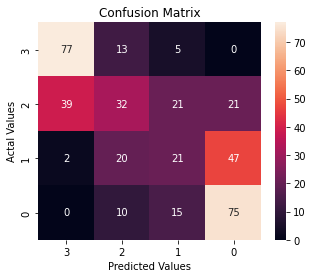

Accuracy of OvO Classifier: 0.54


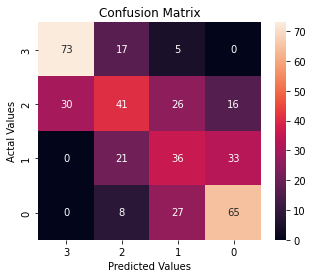

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-rest
OvR_clf = OneVsRestClassifier(LogisticRegression())
OvR_clf.fit(X_train_normalized, y_train)

y_test_pred = OvR_clf.predict(X_test_normalized)
print('Accuracy of OvR Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovr)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train_normalized, y_train)

y_test_pred = OvO_clf.predict(X_test_normalized)
print('Accuracy of OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                     index = ['3','2','1','0'], 
                     columns = ['3','2','1','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents , columns = ['PC1', 'PC2'])
target = pd.Series(y, name='price_range')
result_df = pd.concat([principalDf, target], axis=1)
result_df.head()

# Calculate the variance explained by priciple components

print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

Variance of each component: [0.67050269 0.16473528]

 Total Variance Explained: 83.52


Accuracy of LR OvO Classifier: 0.96
number of principal components: 4


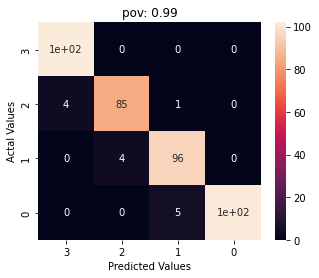

Accuracy of LR OvO Classifier: 0.95
number of principal components: 4


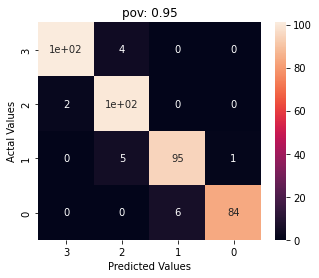

Accuracy of LR OvO Classifier: 0.96
number of principal components: 3


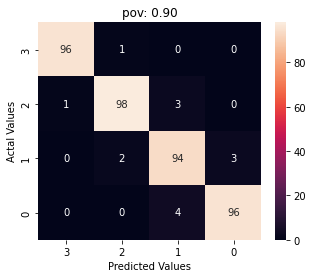

Accuracy of LR OvO Classifier: 0.94
number of principal components: 3


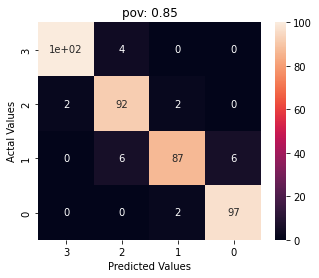

Accuracy of LR OvO Classifier: 0.80
number of principal components: 2


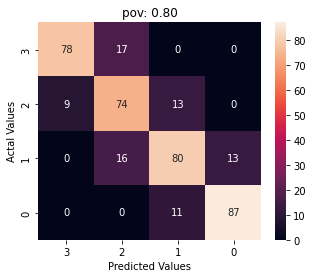

Accuracy of LR OvO Classifier: 0.79
number of principal components: 2


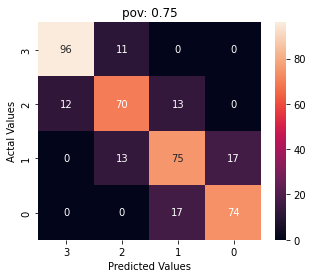

Accuracy of LR OvO Classifier: 0.82
number of principal components: 2


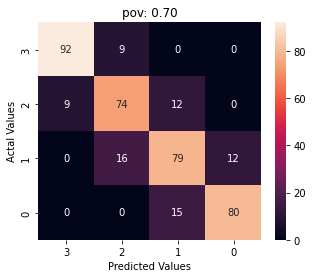

Accuracy of LR OvO Classifier: 0.74
number of principal components: 1


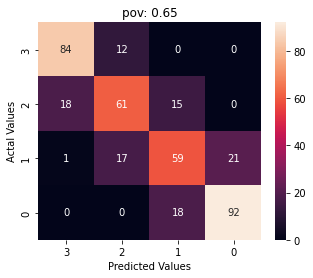

Accuracy of LR OvO Classifier: 0.71
number of principal components: 1


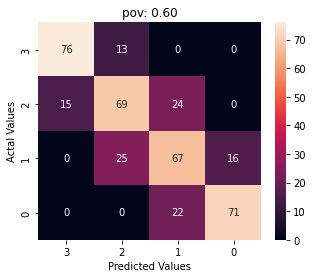

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

pov_list = [0.99, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60]
for pov in pov_list:
    pca = PCA(n_components=pov, svd_solver = "full")
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents)
    projected_X_train, projected_X_test, y_train, y_test = train_test_split(principalDf, y, test_size=0.20)

    # one-vs-one
    OvO_clf = OneVsOneClassifier(LogisticRegression())
    OvO_clf.fit(projected_X_train, y_train)

    y_test_pred = OvO_clf.predict(projected_X_test)
    print('Accuracy of LR OvO Classifier: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))
    print('number of principal components: {:d}'.format(principalDf.shape[1]))

    # confusion matrix (ovo)
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    conf_matrix_df = pd.DataFrame(conf_matrix,
                        index = ['3','2','1','0'], 
                        columns = ['3','2','1','0'])
    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix_df, annot=True)
    plt.title('pov: {:.2f}'.format(pov))
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

In [ ]:
data["new_price_range"] = data['price_range']
# 0 ==> 0  
# 1, 2, 3 ==> 4

for index, row in data.iterrows():
    if row["new_price_range"] != 0:
        data['new_price_range'][index] = 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
X = data.drop('new_price_range', axis=1)
y = data['new_price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


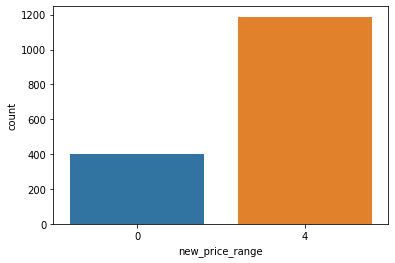

In [ ]:
# visualizing the target variable
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.94


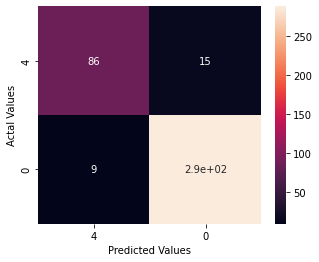

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train, y_train)

y_test_pred = OvO_clf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                    index = ['4','0'], 
                    columns = ['4','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Random Oversampling:

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_over, y_train_over = oversampler.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy: 0.93


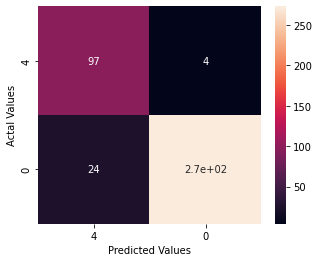

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# one-vs-one
OvO_clf = OneVsOneClassifier(LogisticRegression())
OvO_clf.fit(X_train_over, y_train_over)

y_test_pred = OvO_clf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

# confusion matrix (ovo)
conf_matrix = confusion_matrix(y_test, y_test_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                    index = ['4','0'], 
                    columns = ['4','0'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_df, annot=True)
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


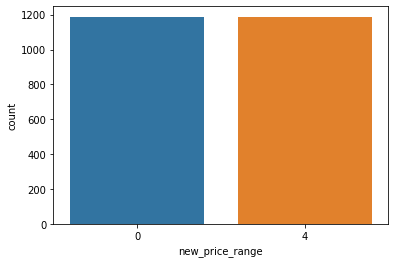

In [ ]:
sns.countplot(y_train_over)